In [1]:
download_dir = './ag_automm_tutorial'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/semantic_segmentation/leaf_disease_segmentation.zip'
from autogluon.core.utils.loaders import load_zip
load_zip.unzip(zip_file, unzip_dir=download_dir)

100%|██████████| 53.3M/53.3M [00:18<00:00, 2.85MiB/s]  


In [2]:
import pandas as pd
import os
dataset_path = os.path.join(download_dir, 'leaf_disease_segmentation')
train_data = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
val_data = pd.read_csv(f'{dataset_path}/val.csv', index_col=0)
test_data = pd.read_csv(f'{dataset_path}/test.csv', index_col=0)
image_col = 'image'
label_col = 'label'
def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

for per_col in [image_col, label_col]:
    train_data[per_col] = train_data[per_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
    val_data[per_col] = val_data[per_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
    test_data[per_col] = test_data[per_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
    

print(train_data[image_col].iloc[0])
print(train_data[label_col].iloc[0])

e:\code\python\dental\ag_automm_tutorial\leaf_disease_segmentation\train_images\00002.jpg
e:\code\python\dental\ag_automm_tutorial\leaf_disease_segmentation\train_masks\00002.png


In [3]:
train_data.head()

,image,label
0,e:\code\python\dental\ag_automm_tutorial\leaf_...,e:\code\python\dental\ag_automm_tutorial\leaf_...
1,e:\code\python\dental\ag_automm_tutorial\leaf_...,e:\code\python\dental\ag_automm_tutorial\leaf_...
2,e:\code\python\dental\ag_automm_tutorial\leaf_...,e:\code\python\dental\ag_automm_tutorial\leaf_...
3,e:\code\python\dental\ag_automm_tutorial\leaf_...,e:\code\python\dental\ag_automm_tutorial\leaf_...
4,e:\code\python\dental\ag_automm_tutorial\leaf_...,e:\code\python\dental\ag_automm_tutorial\leaf_...


c:\Users\admin\.conda\envs\ag\lib\site-packages\transformers\utils\generic.py:462: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Users\admin\.conda\envs\ag\lib\site-packages\transformers\utils\generic.py:319: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Users\admin\.conda\envs\ag\lib\site-packages\transformers\utils\generic.py:319: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Users\admin\.conda\envs\ag\lib\site-packages\transformers\utils\generic.py:319: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_p

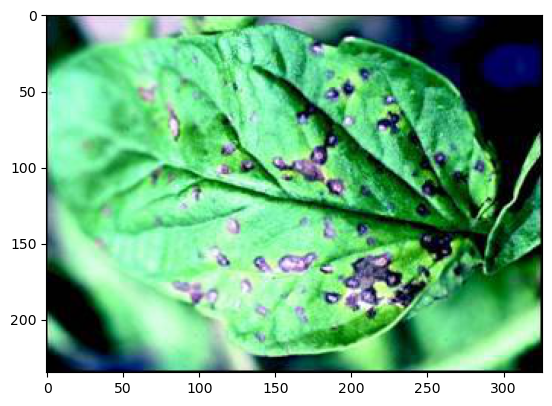

In [4]:
from autogluon.multimodal.utils import SemanticSegmentationVisualizer
visualizer = SemanticSegmentationVisualizer()
visualizer.plot_image(test_data.iloc[0]['image'])

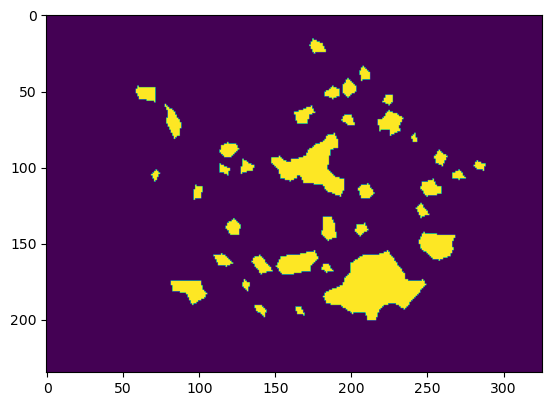

In [5]:
visualizer.plot_image(test_data.iloc[0]['label'])

In [6]:
from autogluon.multimodal import MultiModalPredictor
predictor_zero_shot = MultiModalPredictor(
    problem_type="semantic_segmentation", 
    label=label_col,
     hyperparameters={
            "model.sam.checkpoint_name": "facebook/sam-vit-base",
        },
    num_classes=1, # forground-background segmentation
)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

c:\Users\admin\.conda\envs\ag\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\admin\.cache\huggingface\hub\models--facebook--sam-vit-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

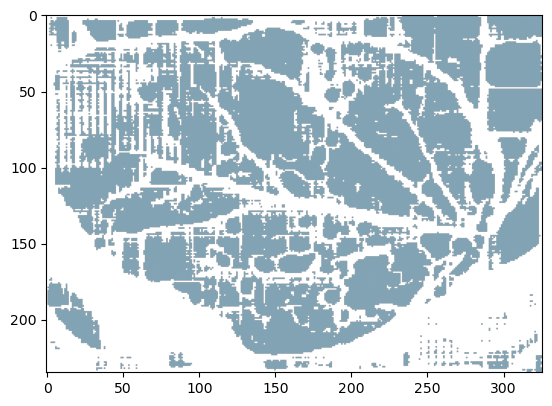

In [7]:
pred_zero_shot = predictor_zero_shot.predict({'image': [test_data.iloc[0]['image']]})
visualizer.plot_mask(pred_zero_shot)

In [9]:
from autogluon.multimodal import MultiModalPredictor
import uuid
save_path = f"./tmp/{uuid.uuid4().hex}-automm_semantic_seg"
predictor = MultiModalPredictor(
    problem_type="semantic_segmentation", 
    label="label",
     hyperparameters={
            "model.sam.checkpoint_name": "facebook/sam-vit-base",
        },
    path=save_path,
)
predictor.fit(
    train_data=train_data,
    tuning_data=val_data,
)

=================== System Info ===================
AutoGluon Version:  1.0.1b20240326
Python Version:     3.10.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          36
Pytorch Version:    2.2.2
CUDA Version:       12.1
Memory Avail:       84.65 GB / 127.73 GB (66.3%)
Disk Space Avail:   346.95 GB / 976.56 GB (35.5%)

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir e:\code\python\dental\tmp\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg
    ```

INFO: Seed set to 0
GPU Count: 1
GPU Count to be Used: 1

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO: `Trainer(val_check_interval=1.0)` was configu

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\admin\.conda\envs\ag\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 100: 'val_iou' reached 0.59286 (best 0.59286), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=0-step=100.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 200: 'val_iou' reached 0.59508 (best 0.59508), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=1-step=200.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 300: 'val_iou' reached 0.64708 (best 0.64708), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=2-step=300.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 400: 'val_iou' reached 0.64662 (best 0.64708), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=3-step=400.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 500: 'val_iou' reached 0.66174 (best 0.66174), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=4-step=500.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 600: 'val_iou' reached 0.67874 (best 0.67874), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=5-step=600.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 700: 'val_iou' reached 0.69766 (best 0.69766), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=6-step=700.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 800: 'val_iou' reached 0.68760 (best 0.69766), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=7-step=800.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 900: 'val_iou' reached 0.69103 (best 0.69766), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=8-step=900.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 1000: 'val_iou' reached 0.70380 (best 0.70380), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=9-step=1000.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 10, global step 1100: 'val_iou' reached 0.71594 (best 0.71594), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=10-step=1100.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 11, global step 1200: 'val_iou' reached 0.72005 (best 0.72005), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=11-step=1200.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 12, global step 1300: 'val_iou' reached 0.71735 (best 0.72005), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=12-step=1300.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 13, global step 1400: 'val_iou' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 14, global step 1500: 'val_iou' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 15, global step 1600: 'val_iou' reached 0.71863 (best 0.72005), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=15-step=1600.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 16, global step 1700: 'val_iou' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 17, global step 1800: 'val_iou' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 18, global step 1900: 'val_iou' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 19, global step 2000: 'val_iou' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 20, global step 2100: 'val_iou' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 21, global step 2200: 'val_iou' reached 0.71869 (best 0.72005), saving model to 'E:\\code\\python\\dental\\tmp\\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg\\epoch=21-step=2200.ckpt' as top 3
AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("e:\code\python\dental\tmp\f862e3f77e264b4ba7ad3a278d609113-automm_semantic_seg")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).


